#Load Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install -U spacy
!python -m spacy download en_core_web_lg
import spacy
nlp = spacy.load('en_core_web_lg')
import random
from collections import Counter #for counting
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)
import json
def pretty_print(pp_object):
    print(json.dumps(pp_objiect, indent=2))
    
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-02 21:08:38.774346: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 21:08:43.618618: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


<ipython-input-1-f455b924fd06>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/IntroToDataScience-SamanthaMathieu/Project 4/Data/only_combined.csv')

In [3]:
df.head()

,year,decade,Combined_Text
0,1926,1920,"A new aspirant for Tom Mix's audiences, named ..."
1,1922,1920,"LONDON, Jan. 30.--Ought girls to be allowed to..."
2,1923,1920,J Oudegeest compares development in U S and Eu...
3,1927,1920,Statement on play by Chinese student to be pro...
4,1928,1920,CITY COLLEGE DRILLS AGAINST R.P.I. PLAYS Varsi...


##Name entity recognition

###Looking at text entities

In [4]:
def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')

In [5]:
explain_text_entities(df['Combined_Text'][0])

Entity: Tom Mix's, Label: PERSON, People, including fictional
Entity: Ken Maynard, Label: PERSON, People, including fictional
Entity: Señor Daredevil, Label: WORK_OF_ART, Titles of books, songs, etc.
Entity: Colony, Label: LOC, Non-GPE locations, mountain ranges, bodies of water
Entity: Mix, Label: PERSON, People, including fictional
Entity: 2,000, Label: MONEY, Monetary values, including unit
Entity: Maynard, Label: PERSON, People, including fictional
Entity: Maynard, Label: PERSON, People, including fictional
Entity: these hectic film days, Label: DATE, Absolute or relative dates or periods
Entity: half, Label: CARDINAL, Numerals that do not fall under another type
Entity: Maynard, Label: PERSON, People, including fictional
Entity: Mix, Label: PERSON, People, including fictional
Entity: Tarzan, Label: PERSON, People, including fictional
Entity: Irish, Label: NORP, Nationalities or religious or political groups
Entity: Mexican, Label: NORP, Nationalities or religious or political grou

In [6]:
one_sentence = df['Combined_Text'][3]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent',jupyter=True)

###Part of speech tagging

In [7]:
example_text = df['Combined_Text'][0]
doc = nlp(example_text)
spacy.displacy.render(doc, style='ent', jupyter=True)

for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence {idx+1} has noun chunk '{noun}'")

sentence 1 has noun chunk 'A new aspirant'
sentence 1 has noun chunk 'Tom Mix's audiences'
sentence 1 has noun chunk 'Ken Maynard'
sentence 1 has noun chunk 'a picture'
sentence 1 has noun chunk '"Señor Daredevil'
sentence 1 has noun chunk 'which'
sentence 1 has noun chunk 'the Colony'
sentence 2 has noun chunk 'the wages'
sentence 2 has noun chunk 'a cowboy'
sentence 2 has noun chunk 'it'
sentence 2 has noun chunk 'no wonder'
sentence 2 has noun chunk 'a rough-rider'
sentence 2 has noun chunk 'a chance'
sentence 2 has noun chunk 'the camera'
sentence 2 has noun chunk 'he'
sentence 2 has noun chunk 'Mr. Mix's income'
sentence 2 has noun chunk 'something'
sentence 3 has noun chunk 'Mr. Maynard'
sentence 3 has noun chunk 'he'
sentence 3 has noun chunk 'he'
sentence 3 has noun chunk 'extraordinary feats'
sentence 3 has noun chunk 'horsemanship'
sentence 4 has noun chunk 'This vehicle'
sentence 4 has noun chunk 'its originality'
sentence 4 has noun chunk 'it'
sentence 4 has noun chunk 'Mr.

In [8]:
one_sentence = df['Combined_Text'][300]
doc = nlp(one_sentence)
spacy.displacy.render(doc, style='ent', jupyter=True)

for token in doc:
    print(token, token.pos_)

John PROPN
Reggi PROPN
of ADP
the DET
Brownsville PROPN
Y.M. PROPN
C.A. PROPN
did VERB
some PRON
of ADP
the DET
cleverest ADJ
boxing NOUN
of ADP
the DET
amateur ADJ
tournament NOUN
at ADP
the DET
Crescent PROPN
Athletic PROPN
Club PROPN
last ADJ
night NOUN
. PUNCT
Reggi PROPN
is AUX
a DET
southpaw NOUN
with ADP
a DET
stiff ADJ
punch NOUN
and CCONJ
a DET
great ADJ
deal NOUN
of ADP
cleverness NOUN
. PUNCT
He PRON
won VERB
two NUM
bouts NOUN
in ADP
the DET
110 NUM
- PUNCT
pound NOUN
class NOUN
, PUNCT
disposing VERB
   SPACE
REGGI PROPN
OUTPOINTS NOUN
MARTIN PROPN
. PUNCT
Brownsville PROPN
Amateur PROPN
Shows VERB
Skill NOUN
in ADP
Crescents NOUN
' PART
Ring PROPN
Tourney PROPN
. PUNCT


##Looking at what the title actually talks about

In [9]:
text = df['Combined_Text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [10]:
doc = nlp(text)

In [11]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

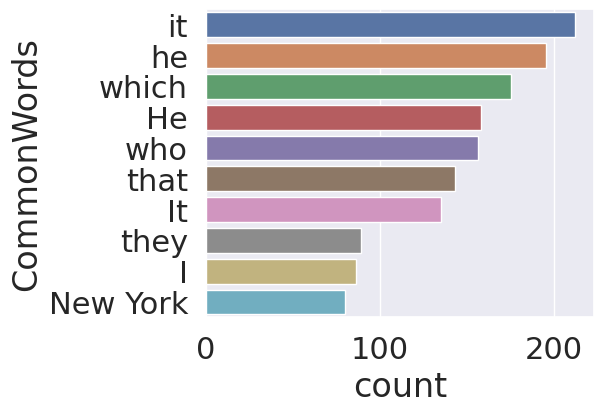

In [12]:
df_nouns = pd.DataFrame(items_of_interest, columns=["CommonWords"])
plt.figure(figsize=(5,4))
sns.countplot(y="CommonWords",
             data=df_nouns,
             order=df_nouns["CommonWords"].value_counts().iloc[:10].index)
plt.show()

###Remove common words

In [13]:
common_topics = []
for token in doc:
    if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        common_topics.append(token)
        
common_topics = [str(x) for x in common_topics]

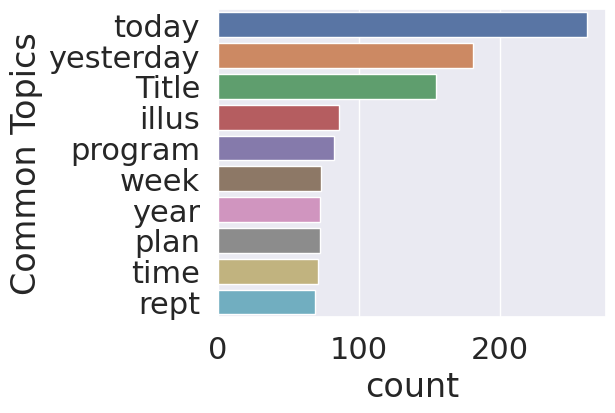

In [14]:
df_nouns = pd.DataFrame(common_topics, columns=["Common Topics"])
df_nouns
plt.figure(figsize=(5,4))
sns.countplot(y="Common Topics",
             data=df_nouns,
             order=df_nouns["Common Topics"].value_counts().iloc[:10].index)
plt.show()

###Exploring common entities

In [15]:
common_topics = []
for ent in doc.ents:
    if ent.label_ not in ["PERCENT", "CARDINAL", "DATE"]:
#         print(ent.text,ent.label_)
        common_topics.append(ent.text.strip())

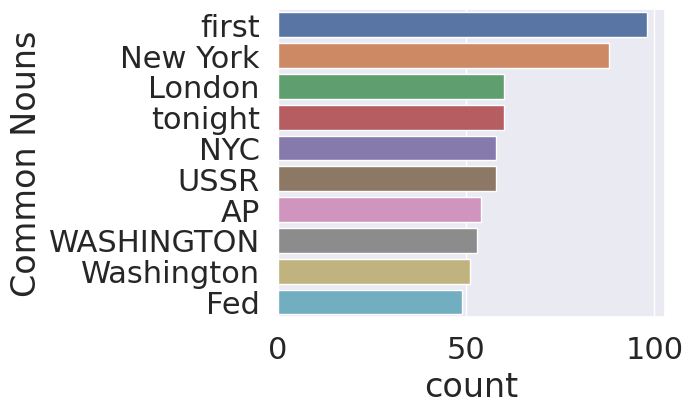

In [16]:
df_commontopics = pd.DataFrame(common_topics, columns=["Common Nouns"])
plt.figure(figsize=(5,4))
sns.countplot(y="Common Nouns",
             data=df_commontopics,
             order=df_commontopics["Common Nouns"].value_counts().iloc[1:11].index)
plt.show()
# from collections import Counter
# item_counter = Counter(items_of_interest)
# item_counter.most_common()

#NLP separated by decade

##Group by decade

In [17]:
def decades_processing_2010(df, decade=2010):
    #select decade and save in new df
    df_decade = df[(df['year'] >= decade) & (df['year'] <= (decade + 10))]

###Looking at what the title talks about by decade

In [18]:
text = df['Combined_Text'].str.cat(sep=' ')
# spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
# Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]

# removing URLs and '&amp' substrings using regex
import re
url_reg  = r'[a-z]*[:.]+\S+'
text   = re.sub(url_reg, '', text)
noise_reg = r'\&amp'
text   = re.sub(noise_reg, '', text)

In [19]:
doc = nlp(text)

In [20]:
items_of_interest = list(doc.noun_chunks)
# each element in this list is spaCy's inbuilt `Span`, which is not useful for us
items_of_interest = [str(x) for x in items_of_interest]
# so we've converted it to string

In [35]:
df_decade = df[(df['year'] >= 1920) & (df['year'] < (1920 + 10))]
text = df_decade['Combined_Text'].str.cat(sep=' ')
 # spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
 # Since `text` might be longer than that, we will slice it off here
max_length = 1000000-1
text = text[:max_length]
doc = nlp(text)
common_topics = []
for token in doc:
   if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
     common_topics.append(token)
common_topics = [str(x) for x in common_topics]

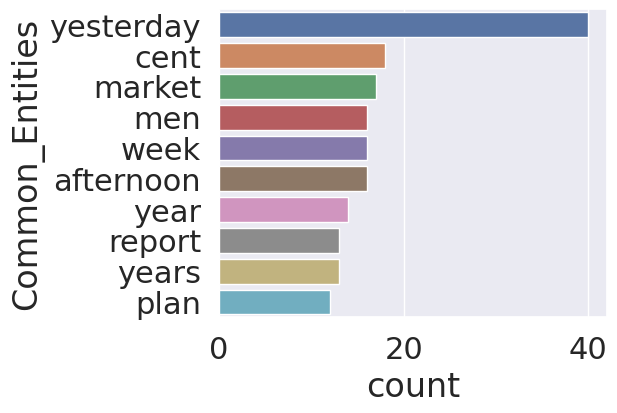

In [36]:
df_commontopics = pd.DataFrame(common_topics, columns=["Common_Entities"])
plt.figure(figsize=(5,4))
sns.countplot(y="Common_Entities",
             data=df_commontopics,
             order=df_commontopics["Common_Entities"].value_counts().iloc[1:11].index)
plt.show()

In [41]:
def common_entities_by_decade(df, decade=1920):
  while decade < 2020:
    df_decade = df[(df['year'] >= decade) & (df['year'] < (decade + 10))]
    text = df_decade['Combined_Text'].str.cat(sep=' ')
    # spaCy enforces a max limit of 1000000 characters for NER and similar use cases.
    # Since `text` might be longer than that, we will slice it off here
    max_length = 1000000-1
    text = text[:max_length]
    doc = nlp(text)
    common_topics = []
    for token in doc:
      if (not token.is_stop) and (token.pos_ == "NOUN") and (len(str(token))>2):
        common_topics.append(token)
    common_topics = [str(x) for x in common_topics]

    df_commontopics = pd.DataFrame(common_topics, columns=["Common_Entities"])
    plt.figure(figsize=(5,4))
    sns.countplot(y="Common_Entities",
                data=df_commontopics,
                order=df_commontopics["Common_Entities"].value_counts().iloc[1:11].index)
    plt.title(f'Decade: {decade}')
    plt.show()
    decade +=10

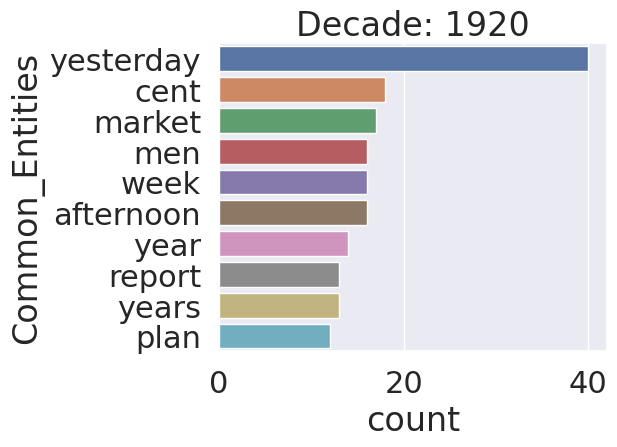

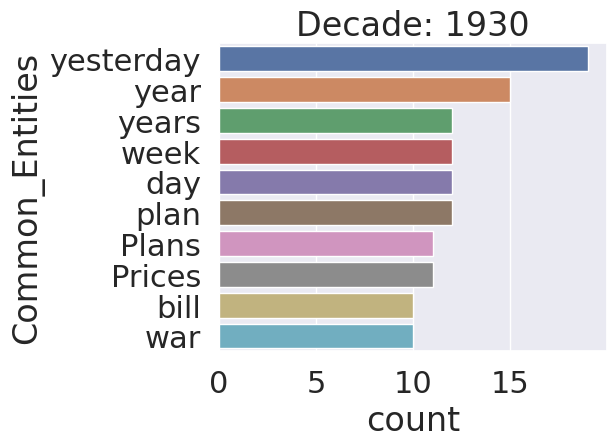

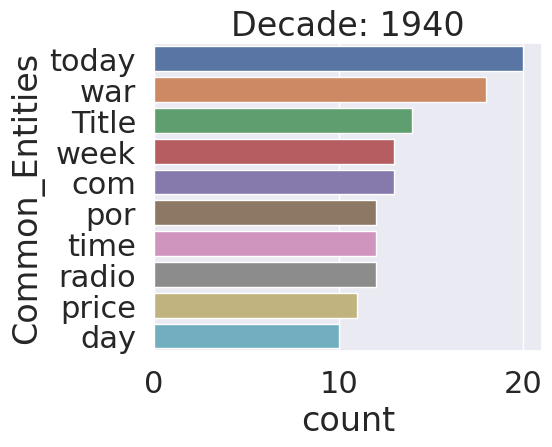

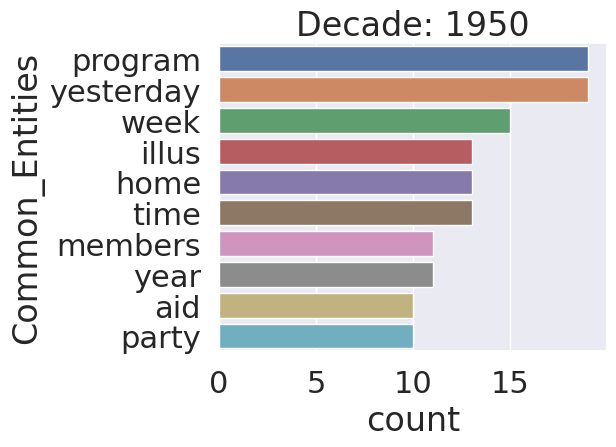

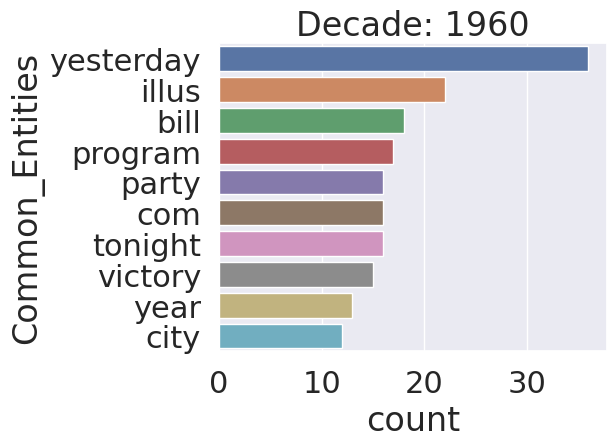

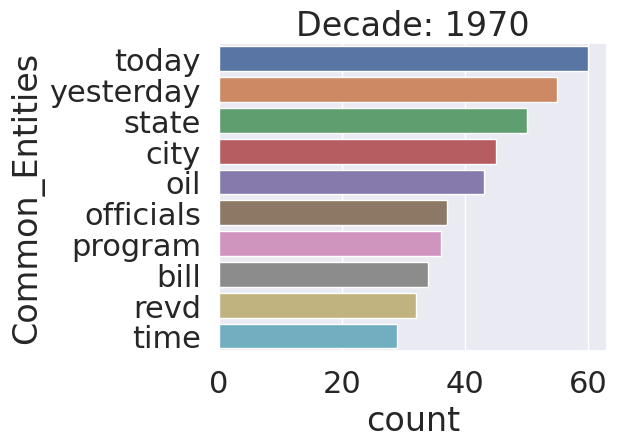

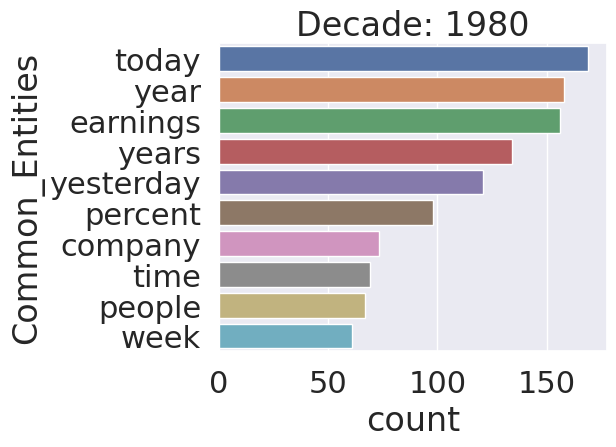

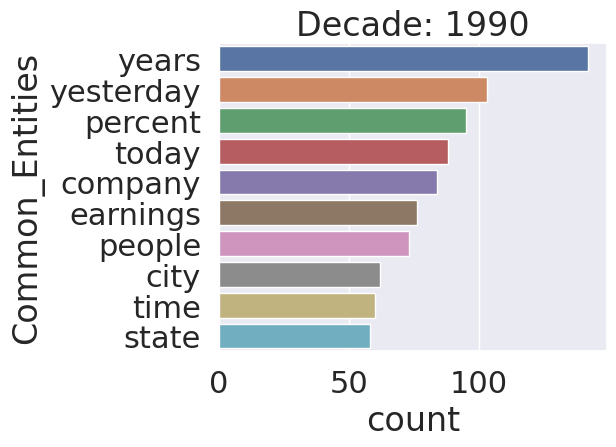

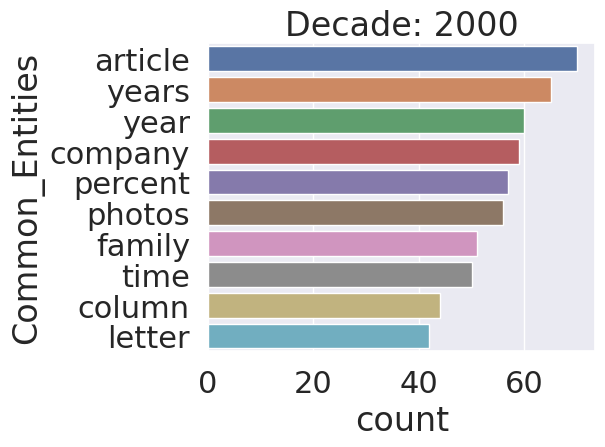

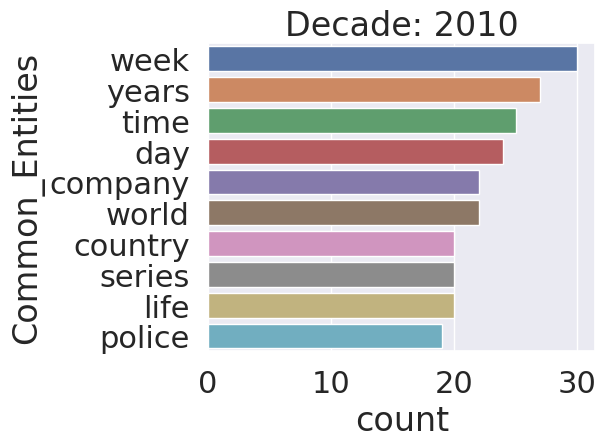

In [42]:
decade = 1920
common_entities_by_decade(df, decade)